# Lab 1

Coding assignment 1 is released [here](https://github.com/sqrta/CMSC457-Spring23). This GitHub repo will also be used for releasing future coding assignments.

## What we're going to cover
- Jupyter speedrun
- What Qiskit offers and the Qiskit stack
- State preparation
- Superdense coding
    <!-- - Superdense coding
    - Deutsch algorithm
    - Classical query complexity of the Deutsch-Josza algorithm -->

## Qiskit

### Python interface

In [50]:
# Do the necessary imports
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from math import sqrt

import qiskit

qiskit.__version__

'0.22.2'

## Jupyter, but really fast

In [51]:
print("This is Python code in a cell, it gets executed when the cell runs")
"The last thing executed in a cell is 'output.'"

This is Python code in a cell, it gets executed when the cell runs


"The last thing executed in a cell is 'output.'"

In [52]:
Out  # and Jupyter remembers it!

{1: '0.22.2',
 2: <Figure size 288x288 with 1 Axes>,
 3: <Figure size 288x288 with 1 Axes>,
 4: <Figure size 288x288 with 1 Axes>,
 5: <Figure size 288x288 with 1 Axes>,
 6: <Figure size 288x288 with 1 Axes>,
 8: <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x222dd97fd30>,
 10: <Figure size 288x288 with 1 Axes>,
 12: <Figure size 504x360 with 1 Axes>,
 13: <Figure size 504x360 with 1 Axes>,
 14: <Figure size 504x360 with 1 Axes>,
 15: <Figure size 504x360 with 1 Axes>,
 16: <Figure size 504x360 with 1 Axes>,
 17: <Figure size 504x360 with 1 Axes>,
 18: <Figure size 504x360 with 1 Axes>,
 19: <Figure size 504x360 with 1 Axes>,
 20: <Figure size 576x288 with 2 Axes>,
 22: <Figure size 504x360 with 1 Axes>,
 23: <Figure size 504x360 with 1 Axes>,
 25: '0.22.2',
 26: <Figure size 576x288 with 2 Axes>,
 27: <Figure size 576x288 with 2 Axes>,
 28: <Figure size 576x288 with 2 Axes>,
 30: <Figure size 504x360 with 1 Axes>,
 32: <Figure size 504x360 with 1 Axes>,
 33: <Figure size 1152x144 

In [53]:
assert not (9 + 10 == 21)
assert 9 + 10 == 21, "duH"

AssertionError: duH

In [54]:
foo = 10

In [55]:
foo + 2

12

In [56]:
foo -= 100

In [57]:
def add1(x):
    return x + 1

In [58]:
add1(foo)

-89

In [59]:
import math
import numpy as np

import pprint as pp

### The four elements 
[IBM docs link](https://qiskit.org/documentation/the_elements.html#terra) with more details and precise language.

[Qiskit main docs](https://qiskit.org/documentation/index.html), where things are split up into these sections.

#### Terra
The bridge from Qiskit to the quantum hardware.
- Experiment setup
    - Where you actually program the sequence of instructions
    - Gates or control pulses directly to the qubits
    - 'Transpilation' – the problem of mapping a circuit to a real device
- Device interaction
    - Communication with IBM cloud
    - Fair queueing system
    - Async job and results API

    
#### Aer
Simulated backends so we can rapidly test and debug small circuits or circuit elements.
- QasmSimulator
    - Ideal and noisy 'shot' simulation (remember: most quantum protocols are __not__ deterministic! Also, noise makes even deterministic protocols non-deterministic in real life.)
    - A few different simulation techniques to handle some circuit classes more efficiently.
- StatevectorSimulator
    - Calculates the full statevector, with dimension exponential in the number of qubits.
- UnitarySimulator
    - Instead of running your circuit, it tells you what the full unitary of your circuit is. This can be expensive to store, because in the worst case, it requires the square of dimension of the Hilbert space!



#### Aqua
- (A)lgorithms for (QU)antum (A)pplications
    - Modules for chemistry, AI/ML, optimization, finance

## State Preparation

<IPython.core.display.Latex object>

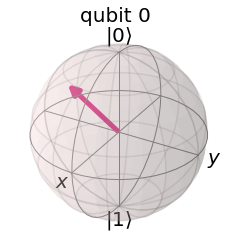

In [60]:
from qiskit import Aer
from qiskit.quantum_info import random_statevector

# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

<IPython.core.display.Latex object>

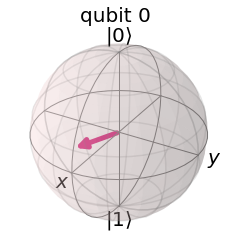

In [61]:
from qiskit.quantum_info import Statevector

# Create specifice 1-qubit state
phi = Statevector([0.8, 0.6])

# Display it nicely
display(array_to_latex(phi, prefix="|\\phi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(phi)

In [62]:
init_gate = Initialize(phi)
init_gate.label = "init"

circ = QuantumCircuit(1)
circ.append(init_gate, [0])
circ.measure_all()
print(circ)

      ┌───────────────┐ ░ ┌─┐
   q: ┤ init(0.8,0.6) ├─░─┤M├
      └───────────────┘ ░ └╥┘
meas: ═════════════════════╩═
                             


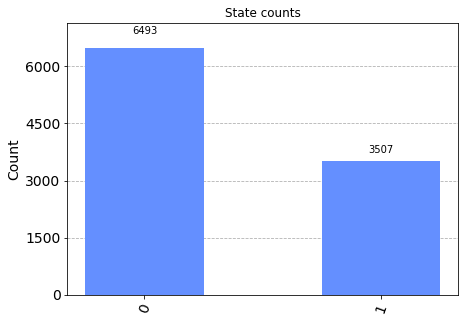

In [65]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(circ,shots=10000).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='State counts')

<IPython.core.display.Latex object>

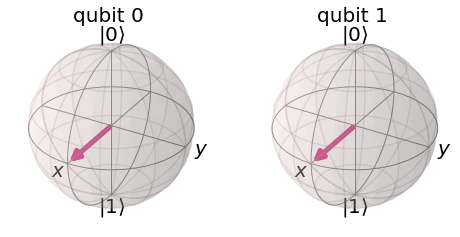

In [69]:
from qiskit.quantum_info import Statevector

# Create specifice 1-qubit state
phi = Statevector([0.5, 0.5,0.5, 0.5])
# phi = Statevector([1/sqrt(2), 0,0, 1/sqrt(2)])

# Display it nicely
display(array_to_latex(phi, prefix="|\\phi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(phi)

In [70]:
init_gate = Initialize(phi)
init_gate.label = "init"

circ = QuantumCircuit(2)
circ.append(init_gate, [0,1])
circ.measure_all()
print(circ)

        ┌────────────────────────┐ ░ ┌─┐   
   q_0: ┤0                       ├─░─┤M├───
        │  init(0.5,0.5,0.5,0.5) │ ░ └╥┘┌─┐
   q_1: ┤1                       ├─░──╫─┤M├
        └────────────────────────┘ ░  ║ └╥┘
meas_0: ══════════════════════════════╩══╬═
                                         ║ 
meas_1: ═════════════════════════════════╩═
                                           


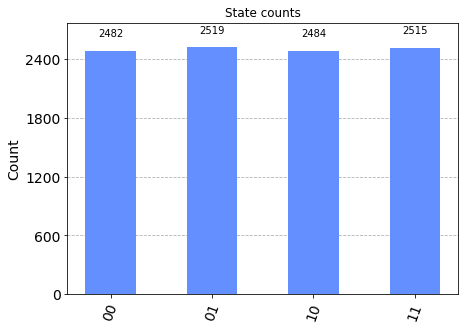

In [71]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(circ,shots=10000).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='State counts')

In [72]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.measure_all()
print(circ)

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas_0: ══════════════╩══╬═
                         ║ 
meas_1: ═════════════════╩═
                           


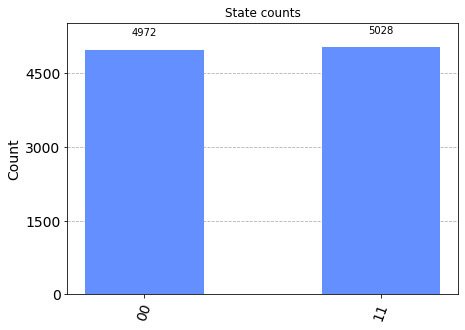

In [73]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(circ,shots=10000).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='State counts')



### W - State
The W state is an entangled quantum state of three qubits which in the bra-ket notation has the following shape
$$
\ket{W} = \frac{1}{\sqrt{3}} (\ket{001}+ \ket{010}+ \ket{100})
$$

The notion of W state has been generalized for n qubits and then refers to the quantum superposition with equal expansion coefficients of all possible pure states in which exactly one of the qubits is in an "excited state" 
$$
\ket{W}_n = \frac{1}{\sqrt{n}} (\ket{00...01}+ \ket{00...10}+ ... + \ket{10...00})
$$

$$
\ket{W}_1 = \ket{1}
$$

$$
\ket{W}_2 = \frac{1}{\sqrt{2}}(\ket{01}+ \ket{10})
$$

In [75]:
n=10
array = [1/sqrt(10) if bin(i).count("1")==1 else 0 for i in range(2**n)]

phi = Statevector(array)
# Display it nicely
display(array_to_latex(phi, prefix="|\\phi\\rangle ="))


<IPython.core.display.Latex object>

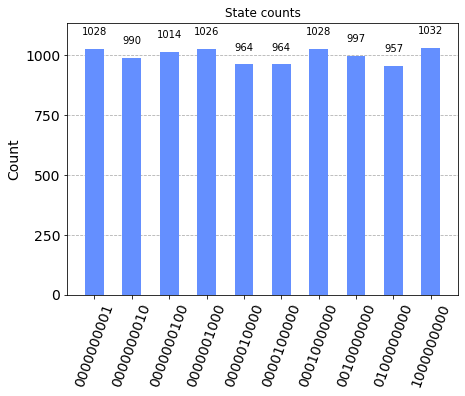

In [77]:
init_gate = Initialize(phi)
init_gate.label = "init"

circ = QuantumCircuit(10)
circ.append(init_gate, range(10))
circ.measure_all()

result = simulator.run(circ,shots=10000).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='State counts')

Qiskit needs to decompose the initial gate `init_gate` into a sequence of hardware support gate before running it on the hardware, which is not scalable for large `N`. Suppose `N=64`, it need to decompose a $2^{64} \times 2^{64}$ matrix!

Bonus Question: How to implement a Qiskit function that can produce a $\ket{W}_N$ state preparation circuit for large $N, N=2^n$?

Hint: Think about the program in a recursive way. You need one ancilla qubit.


<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

------------------------------





Answer

The program uses qubit 0 as an ancilla qubit and proceeds by induction on variable $n$ to create W-state over qubit $1,2,...,2^{n-1}$. Suppose $N=2^{n-1}$. When $n=1$, it just applies Pauli X gate on qubit 1 to create state $\ket{W_1} = \ket{1}$. For general $n > 1$, it first call itself recursively to create W-state $\ket{W_{N/2}}$ on the qubits $1,2,...,N/2$. Now the qubits $1,2,...,N/2$ are already in a superposition where only basis states of Hamming weight 1 occur. Next, it flip the ancilla qubit from $\ket{0} \mapsto \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$ and this ancilla will serve as a flag whether we are in the
block of the first $N/2$ qubits or the block of the last $N/2$ qubits. If the flag is “0”, there is nothing to be done. If the
flag is “1”, it moves the state of the first $N/2$ qubits to the state of the last $N/2$ qubits and vice versa. This is
accomplished using a sequence of controlled SWAP operation implemented in the sub-program $S'$. This almost creates the state $\ket{W_N}$ on qubits $1,2,...,N$, however, one issue remains: the state is now entangled with the
state of qubit 0. So the program $S'$ uses a sequence of `CNOT` gate to reset qubit 0.

In [78]:
def wstate(circ,n):
    # use qubit 0 as the ancilla qubit
    if n==1:
        circ.x(1)
        return
    wstate(circ, n//2)
    circ.h(0)
    for i in range(1,n//2+1):
        circ.cswap(0, i, i+n//2)
    for i in range(1,n//2+1):
        circ.cnot(i+n//2,0)


         ┌───┐   ┌───┐┌───┐      ┌───┐┌───┐┌───┐            ┌───┐┌───┐┌───┐»
    q_0: ┤ H ├─■─┤ X ├┤ H ├─■──■─┤ X ├┤ X ├┤ H ├─■──■──■──■─┤ X ├┤ X ├┤ X ├»
         ├───┤ │ └─┬─┘└───┘ │  │ └─┬─┘└─┬─┘└───┘ │  │  │  │ └─┬─┘└─┬─┘└─┬─┘»
    q_1: ┤ X ├─X───┼────────X──┼───┼────┼────────X──┼──┼──┼───┼────┼────┼──»
         └───┘ │   │        │  │   │    │        │  │  │  │   │    │    │  »
    q_2: ──────X───■────────┼──X───┼────┼────────┼──X──┼──┼───┼────┼────┼──»
                            │  │   │    │        │  │  │  │   │    │    │  »
    q_3: ───────────────────X──┼───■────┼────────┼──┼──X──┼───┼────┼────┼──»
                               │        │        │  │  │  │   │    │    │  »
    q_4: ──────────────────────X────────■────────┼──┼──┼──X───┼────┼────┼──»
                                                 │  │  │  │   │    │    │  »
    q_5: ────────────────────────────────────────X──┼──┼──┼───■────┼────┼──»
                                                    │  │  │        │    │  »

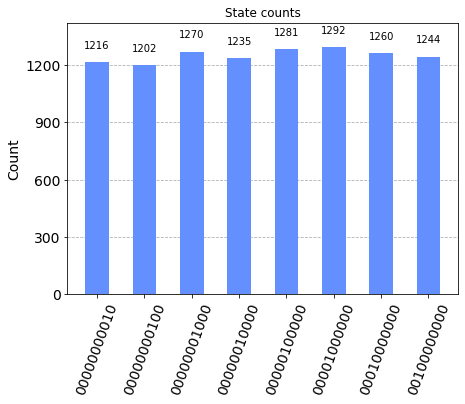

In [81]:
circ = QuantumCircuit(11)
wstate(circ, 8)
circ.measure_all()
print(circ)

result = simulator.run(circ,shots=10000).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='State counts')

You can find how to produce general construction W-state [here](https://quantumcomputing.stackexchange.com/questions/4350/general-construction-of-w-n-state)

### Some potential rough patches with quantum programming
- Limited 'quantum volume' of real experiments
    - Defined as $2^n$ for the largest $n$ that doesn't give garbage for 'square' circuits
- Debugging can be _really_ tough.
    - Depends heavily on analysis and visualization tools and how well you plan to test
    - The information is diffuse in the system
    - Noise + a lot of steps in the pipeline between your keyboard and the device
    
###  Some great upsides to all quantum programming languages/toolkits
- Most of the API is stable
- Interactive, and you can actually just go and try stuff
- Access to literally the newest in quantum computing research

---
## Superdense coding

![](Superdense_coding.png)

We're going to use four entangled pairs of qubits to relay one byte of data at a time. We'll be able to decode $n$ bytes by running $\frac{n}{2}$ different 8-qubit quantum circuits!

Alice wants to send Bob an email, but also has a 2 billion dollar research budget.
How can Alice spend as much money as possible in the name of efficiency? With superdense coding!

First, Alice hires an undergrad named Charlie to press literally two buttons (on demand, this is where the big bucks are) to entangle pairs of qubits. 

Charlie carefully packs one qubit from each pair up for Bob, taking care not to drop it* or let it decohere. Alice gets the other qubit, and secretly applies one of $I$, $Z$, $X$, or $ZX$ to that qubit, then Alice sends the modified qubit to Bob too.

Bob has the qubits from both Charlie and Alice now, and can decode the email with a team of post-docs and liberal application of Bell measurement.

*Yt is actually shockingly inexpensive

In [88]:
# Set a mapping for qubits to give to Alice and Bob
to_bob = [2*i for i in range(4)]
to_alice = [2*i+1 for i in range(4)]

# to_alice = [2*i for i in range(4)]
# to_bob = [2*i+1 for i in range(4)]

# to_alice = [1, 2, 5, 3]
# to_bob = [7, 4, 0, 6]


# Charlie is our entanglement source.
# Press the button, Charlie.
def charlie(qc, to_alice, to_bob):
    qc.reset(range(8))
    qc.h(to_alice)
    qc.cx(to_alice,to_bob)
   
    

# Alice encodes byte by byte, four 'crumbs' at a time.
# (a crumb is a pair of bits; not quite a nibble and much less than a byte)
def alice(qc, byte, to_alice):

    # A crumb is the word for 2 bits!
    # Given a big-endian byte, we want little-endian list of crumbs.
    # Grab the bits in zero padded pairs with a combo of shift 
    #   and bitwise AND.
    
    # This list will have the bits in pairs ['10', '32', ..., 'n(n-1)']
    crumbs = ['11','10','01','00']
#     print(crumbs)
    
    # cidx for 'crumb index'
    for cidx in range(4):
        if crumbs[cidx] == '11':
            qc.x(to_alice[cidx])
            qc.z(to_alice[cidx])
        elif crumbs[cidx] == '10':
            qc.x(to_alice[cidx])
        elif crumbs[cidx] == '01':
            qc.z(to_alice[cidx])
        elif crumbs[cidx] == '00':
            pass


            
def bob(qc, to_alice, to_bob):
    qc.cx(to_alice,to_bob)
    qc.h(to_alice)
    
    

# Write the quantum circuit
qc = qiskit.QuantumCircuit(8)

charlie(qc, to_alice, to_bob)
qc.barrier()
print("Circuit after Charlie:")
print(qc)

# Test all four crumbs, 00 01 10 11, at once
b = bytearray([0b00011011])
alice(qc, b[0], to_alice)
qc.barrier()
print("Circuit after Alice:")
print(qc)

bob(qc, to_alice, to_bob)
# measure_all applies a barrier()
qc.measure_all()
print("Circuit after Bob:")
print(qc)

Circuit after Charlie:
               ┌───┐ ░ 
q_0: ─|0>──────┤ X ├─░─
          ┌───┐└─┬─┘ ░ 
q_1: ─|0>─┤ H ├──■───░─
          └───┘┌───┐ ░ 
q_2: ─|0>──────┤ X ├─░─
          ┌───┐└─┬─┘ ░ 
q_3: ─|0>─┤ H ├──■───░─
          └───┘┌───┐ ░ 
q_4: ─|0>──────┤ X ├─░─
          ┌───┐└─┬─┘ ░ 
q_5: ─|0>─┤ H ├──■───░─
          └───┘┌───┐ ░ 
q_6: ─|0>──────┤ X ├─░─
          ┌───┐└─┬─┘ ░ 
q_7: ─|0>─┤ H ├──■───░─
          └───┘      ░ 
Circuit after Alice:
               ┌───┐ ░            ░ 
q_0: ─|0>──────┤ X ├─░────────────░─
          ┌───┐└─┬─┘ ░ ┌───┐┌───┐ ░ 
q_1: ─|0>─┤ H ├──■───░─┤ X ├┤ Z ├─░─
          └───┘┌───┐ ░ └───┘└───┘ ░ 
q_2: ─|0>──────┤ X ├─░────────────░─
          ┌───┐└─┬─┘ ░ ┌───┐      ░ 
q_3: ─|0>─┤ H ├──■───░─┤ X ├──────░─
          └───┘┌───┐ ░ └───┘      ░ 
q_4: ─|0>──────┤ X ├─░────────────░─
          ┌───┐└─┬─┘ ░ ┌───┐      ░ 
q_5: ─|0>─┤ H ├──■───░─┤ Z ├──────░─
          └───┘┌───┐ ░ └───┘      ░ 
q_6: ─|0>──────┤ X ├─░────────────░─
          ┌───┐└─┬─┘ ░        

In [89]:
# Noiseless simulation
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1)
result = job.result()
print("Counts:", result.get_counts(qc))

Counts: {'00100111': 1}


## Quantum Teleportation

![](teleportation-circuit.png)

In [91]:
qubit = QuantumRegister(3, name="qubit") 
creg = ClassicalRegister(2, name="creg")
qc= QuantumCircuit(qubit,creg)

qc.x(qubit[0]).c_if(creg[0], 1) # Apply gates if the registers are in the state '1'
print(qc)

         ┌───┐
qubit_0: ┤ X ├
         └─╥─┘
qubit_1: ──╫──
           ║  
qubit_2: ──╫──
           ║  
   creg: ══■══
              
